# **KUIS 1 PEMBELAJARAN MESIN**
**Nama : Elis Nurhidayati**

**NIM : 2241720035**

**Kelas / No.Urut : TI-3C / 08**

---

Link Google Colab: https://drive.google.com/file/d/1ud_C3vEgmmjinr1L5lWdAOTZS7xKYsyT/view?usp=sharing

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW), Link dataset: https://www.kaggle.com/datasets/jessicali9530/lfw-dataset.

Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [ ]:
# Load required library
# Import Required Library
# Import Required Library
!pip install opencv-python -q
!pip install scikit-learn -q
!pip install matplotlib -q
!pip install seaborn -q

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


# Load Data

In [ ]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True) # No. 1 & 2

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}') # No. 2
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


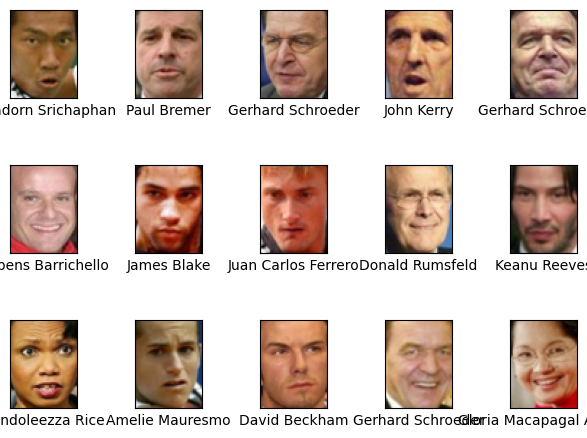

In [ ]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocessing

In [ ]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''
# Preprocessing: Resize images to 64x64 for consistency and normalize pixel values
processed_images = []

# No. 3
for img in faces.images:
    # Resize image to (64, 64)
    resized_img = cv2.resize(img, (64, 64))
    # Normalize pixel values (0 to 1)
    normalized_img = resized_img / 255.0
    processed_images.append(normalized_img)

processed_images = np.array(processed_images)


# Features Extraction

In [ ]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''
# No. 4
def extract_histogram_features(images):
    features = []
    for img in images:
        # Calculate histograms for each channel (R, G, B)
        r_hist = np.histogram(img[:, :, 0], bins=256, range=(0, 1))[0]
        g_hist = np.histogram(img[:, :, 1], bins=256, range=(0, 1))[0]
        b_hist = np.histogram(img[:, :, 2], bins=256, range=(0, 1))[0]
        # Concatenate histograms to form feature vector
        hist_features = np.concatenate((r_hist, g_hist, b_hist))
        features.append(hist_features)
    return np.array(features)

# Extract features from processed images
X = extract_histogram_features(processed_images)
y = faces.target

# Build Model

In [ ]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''
# No. 5
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build SVM model
svm_model = SVC(kernel='linear', random_state=42)
# Fit model to training data
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# Evaluation

In [ ]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''
# No. 6
from sklearn.metrics import classification_report

# Train evaluation
y_train_pred = svm_model.predict(X_train) # Predict using the trained model

print('Train Classification Report:')
print(classification_report(y_train, y_train_pred, zero_division=0))
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))  # Tambahan evaluasi akurasi untuk data training
print('------------------------------------------------------')
# Test evaluation
y_test_pred = svm_model.predict(X_test) # Predict using the trained model

print('Test Classification Report:')
print(classification_report(y_test, y_test_pred, zero_division=0))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))  # Tambahan evaluasi akurasi untuk data testing


Train Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        37
           3       0.17      0.04      0.06        28
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        34
           6       0.50      0.09      0.15        11
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        10
           9       0.80      0.36      0.50        11
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00        62
          12       0.00      0.00      0.00        27
          13       0.00      0.00      0.00        22
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00         

# Challenge

Train Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       1.00      0.09      0.17        11
           2       0.20      0.03      0.05        37
           3       1.00      0.25      0.40        28
           4       0.00      0.00      0.00        15
           5       0.83      0.15      0.25        34
           6       1.00      0.27      0.43        11
           7       1.00      0.11      0.20        18
           8       0.00      0.00      0.00        10
           9       1.00      0.45      0.62        11
          10       0.00      0.00      0.00         9
          11       1.00      0.10      0.18        62
          12       0.00      0.00      0.00        27
          13       0.67      0.09      0.16        22
          14       0.40      0.08      0.13        26
          15       1.00      0.08      0.14        13
          16       0.00      0.00   

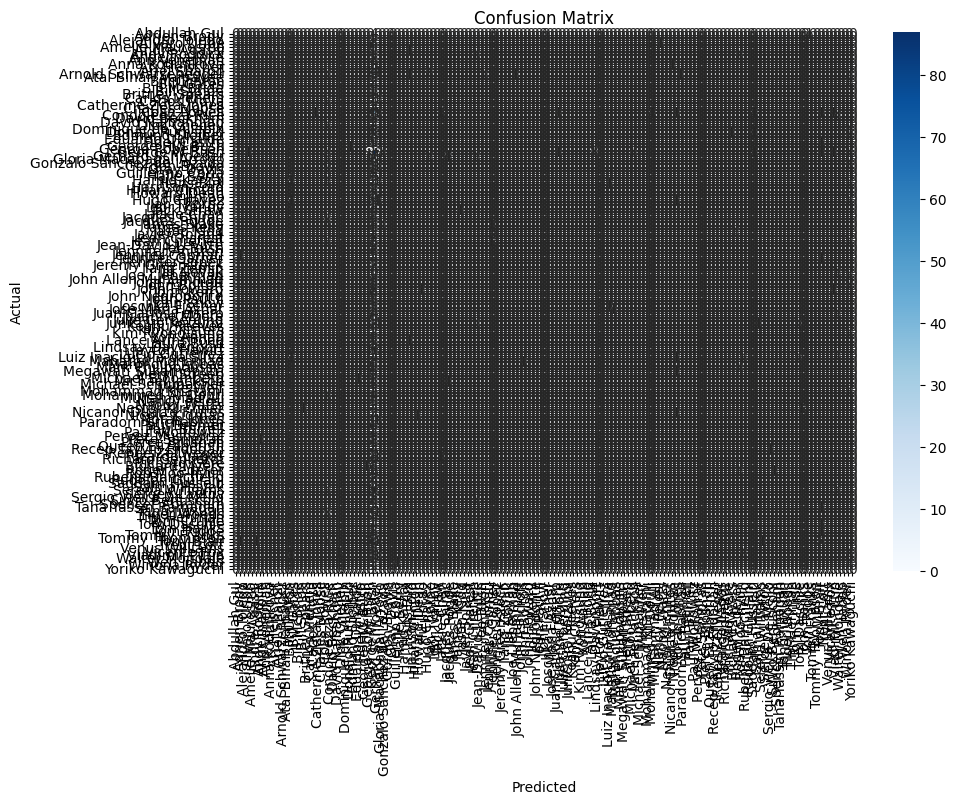

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from skimage.feature import hog

# 1. Menggunakan fitur lain selain histogram
# Feature Extraction: Extract HOG features
def extract_hog_features(images):
    hog_features = []
    for img in images:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        features = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
        hog_features.append(features)
    return np.array(hog_features)

X = extract_histogram_features(processed_images)
X_hog = extract_hog_features(processed_images)

# Mengkombinasikan fitur histogram and HOG
X_combined = np.concatenate((X, X_hog), axis=1)
y = faces.target

# 2. Model selain SVM
# 3. Report dengan Confusion Matrix
# Train evaluation with Random Forest
rf_model = RandomForestClassifier()  # Inisialisasi model
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
print('Train Classification Report (Random Forest):')
print(classification_report(y_train, y_train_pred_rf, zero_division=0))
print('Train Accuracy (Random Forest):', accuracy_score(y_train, y_train_pred_rf))
print('------------------------------------------------------')

# Test evaluation with Random Forest
y_test_pred_rf = rf_model.predict(X_test)
print('Random Forest Test Classification Report:')
print(classification_report(y_test, y_test_pred_rf, zero_division=0))
print('Random Forest Test Accuracy:', accuracy_score(y_test, y_test_pred_rf))

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)  # Ensure faces.target_names is defined
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
